<a href="https://colab.research.google.com/github/lydiahmorah/FUTURE_DS_02-Loan-Prediction/blob/master/BANK_LOAN_PREDICTIONaccurate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [996]:
#importinf the pandas library
import pandas as pd
import numpy as np

#uploading the data/connecting to the data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.Display the Top 5 Rows Of the Dataset**

In [997]:

Churn_data=pd.read_csv("/content/drive/MyDrive/Python Projects/Loan prediction/train_u6lujuX_CVtuZ9i.csv")
Churn_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **2.Display the last 5 Rows Of the Dataset**

In [998]:
#1.Display the last 5 Rows Of the Dataset
Churn_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# **3. Find Shape of The Dataset (Number of Rows And Number of Columns)**

In [999]:
# Find Shape of The Dataset (Number of Rows And Number of Columns)
Churn_data.shape

(614, 13)

In [1000]:
#printing the shape attributes
print("The Number of Rows",Churn_data.shape[0])
print("The Number of Columns",Churn_data.shape[1])

The Number of Rows 614
The Number of Columns 13


# **4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column**

In [1001]:
# 4. Get Information About The Dataset Like Total Number Rows, Total Number of
# Columns, Datatypes of Each Column
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The columns that contain missing/null values are:

* **Gender:** 13 missing values
* **Married:** 3 missing values
* **Dependents:** 15 missing values
* **Self_Employed:** 32 missing values
* **LoanAmount:** 22 missing values
* **Loan_Amount_Term:** 14 missing values
* **Credit_History:** 50 missing values


In [1002]:
#describe only the numerical column ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
descriptive_stats=Churn_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].describe()
descriptive_stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Bivariate Analysis of the Target variable (Loan status) VS Credit history**

In [1003]:
#check how credit history affect the loan status of  each of the applicant using pd.cross tab
pd.crosstab(Churn_data['Credit_History'],Churn_data['Loan_Status'],margins=True)

#from the output applicants with credit history of  1 are more eligible for a loan approval than those with 0

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# **Applicant Income istribution**

<Axes: >

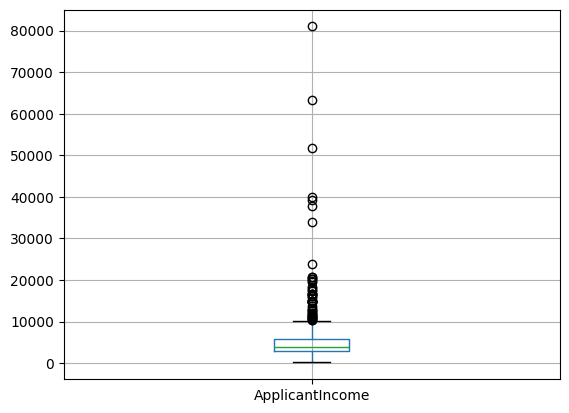

In [1004]:
#box plot for the applicants income
Churn_data.boxplot(column='ApplicantIncome')

#There are alot of outliers   in the  applicants income

array([[<Axes: title={'center': 'ApplicantIncome'}>]], dtype=object)

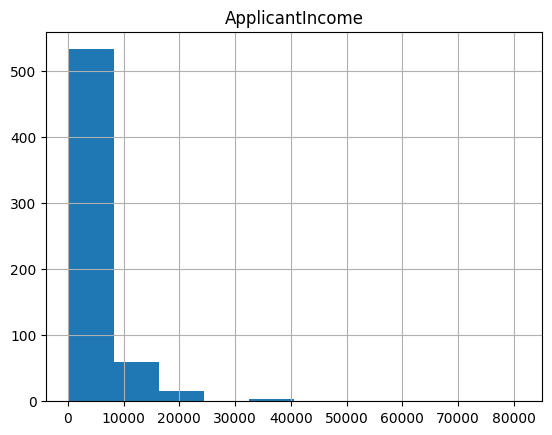

In [1005]:
 # applicants income and co- applicants income histogram
 Churn_data.hist(column='ApplicantIncome')

array([[<Axes: title={'center': 'CoapplicantIncome'}>]], dtype=object)

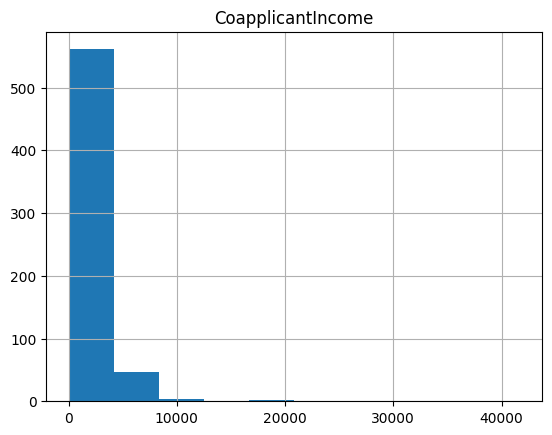

In [1006]:
 #  co- applicants income histogram

 Churn_data.hist(column='CoapplicantIncome')

 #both incomes are right skewed


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

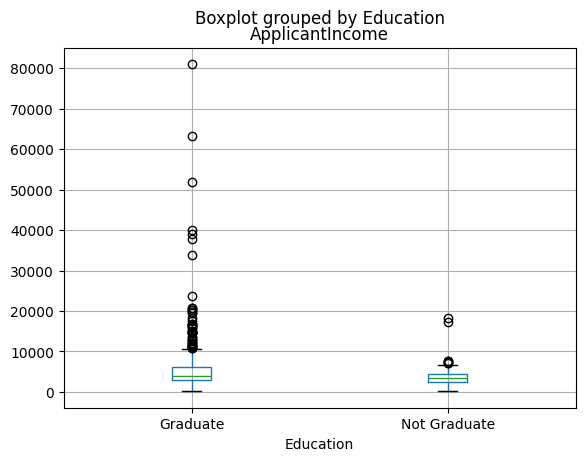

In [1007]:
#plotting applicants income by education using a boxplot
Churn_data.boxplot(column='ApplicantIncome',by='Education')

<Axes: >

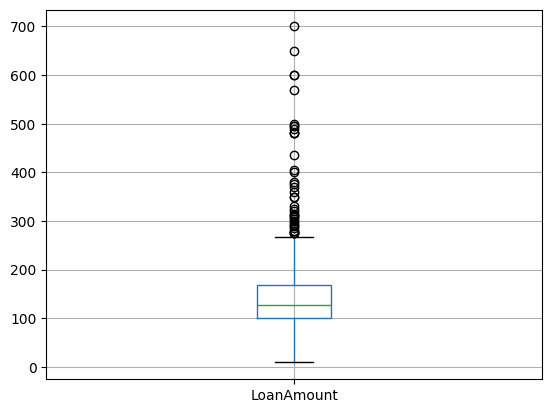

In [1008]:
#checking the loan amount variable using a box plot
Churn_data.boxplot(column='LoanAmount')

# **Loan Distirbution**


# The LoanAmount histogram is right-skewed, indicating most loans are small, with fewer high-value loans creating a long tail. This skew suggests the median loan is less than the mean.

array([[<Axes: title={'center': 'LoanAmount'}>]], dtype=object)

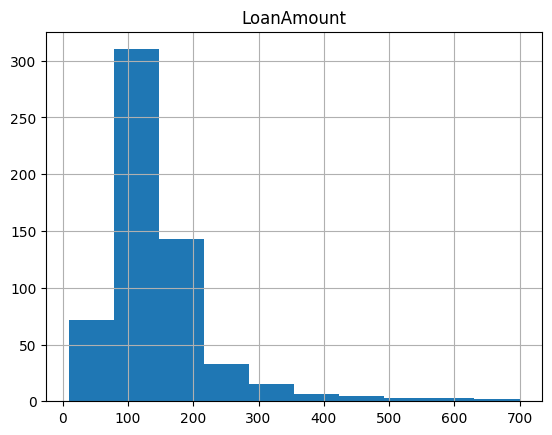

In [1009]:
#checking the loan amount variable using a histogram
Churn_data.hist(column='LoanAmount')
# the loan is right skewed

# **Log Transformation of the loan amount**

array([[<Axes: title={'center': 'LoanAmount_log'}>]], dtype=object)

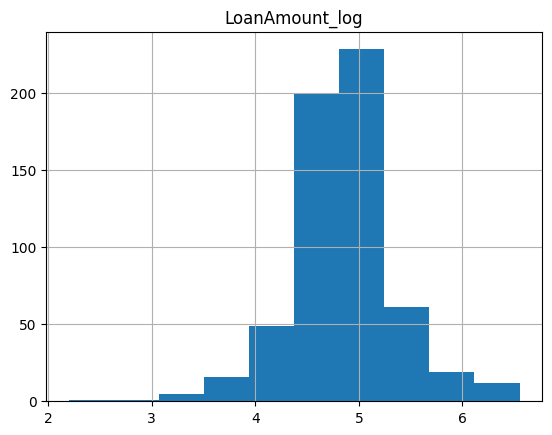

In [1010]:
# nrmalizing the loan amount using the log transformation
Churn_data['LoanAmount_log']=np.log(Churn_data['LoanAmount'])

#plotting the histogram of the loanamount_log
Churn_data.hist(column='LoanAmount_log')


# **5. Check Null Values In The Dataset**

In [1011]:
#Check Null Values In The Dataset
Churn_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [1012]:
#fill null values in gender with mode
Churn_data['Gender'].fillna(Churn_data['Gender'].mode()[0],inplace=True)

<ipython-input-1012-dc892986f13d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Churn_data['Gender'].fillna(Churn_data['Gender'].mode()[0],inplace=True)


In [1013]:
#fill null values in Married with mode
Churn_data['Married']=Churn_data['Married'].fillna(Churn_data['Married'].mode()[0])

In [1014]:
#fill null values in Dependents with mode
Churn_data['Dependents']=Churn_data['Dependents'].fillna(Churn_data['Dependents'].mode()[0])

In [1015]:
#fill null values in Loan_Amount_Term with mode
Churn_data['Loan_Amount_Term']=Churn_data['Loan_Amount_Term'].fillna(Churn_data['Loan_Amount_Term'].mode()[0])

In [1016]:
#the mode in Self_Employed column is 'No' so let us replace the missing values
Churn_data['Self_Employed']=Churn_data['Self_Employed'].fillna(Churn_data['Self_Employed'].mode()[0])

In [1017]:
#fill null values in LoanAmount with mean
Churn_data.LoanAmount=Churn_data.LoanAmount.fillna(Churn_data.LoanAmount.mean())
Churn_data.LoanAmount_log=Churn_data.LoanAmount_log.fillna(Churn_data.LoanAmount_log.mean())

In [1018]:
#fill null values in Credit_History with mode
#fill null values in Dependents with mode
Churn_data['Credit_History']=Churn_data['Credit_History'].fillna(Churn_data['Credit_History'].mode()[0])

In [1019]:
Churn_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [1020]:
#combining ApplicantIncome and CoapplicantIncome into total income column and then normalize them using log
Churn_data['Total_Income']=Churn_data['ApplicantIncome']+Churn_data['CoapplicantIncome']
Churn_data['Total_Income_log']=np.log(Churn_data['Total_Income'])
Churn_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


array([[<Axes: title={'center': 'Total_Income_log'}>]], dtype=object)

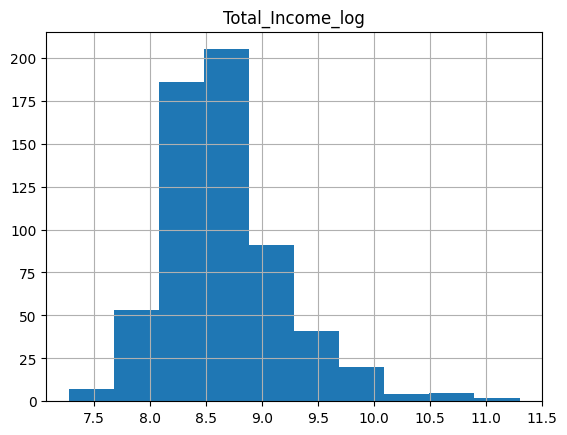

In [1021]:
#histogram of Total_income_log
Churn_data.hist(column='Total_Income_log')

In [1022]:
#But first let us drop the index column that is the loan_id that is not required
#dropping the loan_id column
Churn_data=Churn_data.drop('Loan_ID',axis=1)

In [1023]:
#dropping other columns ['ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','LoanAmount_log'
Churn_data=Churn_data.drop(['Gender','ApplicantIncome','CoapplicantIncome','LoanAmount','Property_Area','Total_Income','LoanAmount_log'],axis=1)

In [1024]:
Churn_data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [1025]:
#replacing the 3+ value in the depndants column
Churn_data['Dependents']=Churn_data['Dependents'].replace(to_replace="3+",value='4')

In [1026]:

print(Churn_data['Married'].unique())
print(Churn_data['Education'].unique())
print(Churn_data['Self_Employed'].unique())


['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']


In [1027]:
#transform non numeric columns to numeric using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Churn_data['Married']=le.fit_transform(Churn_data['Married'])
Churn_data['Education']=le.fit_transform(Churn_data['Education'])
Churn_data['Self_Employed']=le.fit_transform(Churn_data['Self_Employed'])
Churn_data['Loan_Status']=le.fit_transform(Churn_data['Loan_Status'])
Churn_data['Dependents']=le.fit_transform(Churn_data['Dependents'])
Churn_data.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income_log
0,0,0,0,0,360.0,1.0,1,8.674026
1,1,1,0,0,360.0,1.0,0,8.714568
2,1,0,0,1,360.0,1.0,1,8.006368
3,1,0,1,0,360.0,1.0,1,8.505323
4,0,0,0,0,360.0,1.0,1,8.699515


In [1028]:
#creating the dependent and independent variables
X=Churn_data.drop('Loan_Status',axis=1)
y=Churn_data['Loan_Status']
X.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income_log
0,0,0,0,0,360.0,1.0,8.674026
1,1,1,0,0,360.0,1.0,8.714568
2,1,0,0,1,360.0,1.0,8.006368
3,1,0,1,0,360.0,1.0,8.505323
4,0,0,0,0,360.0,1.0,8.699515


# **10. Creating The Feature Variable X and Target Variable y**

In [1029]:
#splitting the data to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [1030]:
X_train.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income_log
83,1,0,0,0,360.0,1.0,9.017968
90,1,0,0,0,360.0,1.0,8.675564
227,1,2,0,0,360.0,1.0,8.980298
482,1,0,0,0,360.0,1.0,8.562740
464,0,0,0,0,360.0,0.0,8.334712


# **11.Feature Scaling**
Feature scaling is a technique used in data preprocessing to normalize or standardize numerical features in a dataset.

For instance in this dataset, the values are not within the same range.
some 1, 0 and others are 6000.

Feature scaling important for machine learning algorithims which calculates distance between data. If not scalled, the values with high range will start dominating when calculating distance.
Some algorithims that require feature scaloing are:Logistic regression, KNeares Neighbor,Neural Networks,Support Vector Machine,Linear Regression.

Non-Linear algorithims like Random Forest.Decision Tree are not affected by feature scaling.


In [1031]:
#Extract columns with high range that neeeds feature scaling
#col_scaling=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [1032]:
#importing the standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

#instantiating The StandardScaler
st=StandardScaler()

#scaling the columns
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [1033]:
X.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income_log
0,0,0,0,0,360.0,1.0,8.674026
1,1,1,0,0,360.0,1.0,8.714568
2,1,0,0,1,360.0,1.0,8.006368
3,1,0,1,0,360.0,1.0,8.505323
4,0,0,0,0,360.0,1.0,8.699515


# **12. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation**

In [1034]:
#importing the models
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# **Linear Regression**

In [1035]:
#linear regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [1036]:
#linear regreesion accuracy
y_pred=log_reg.predict(X_test)
log_reg_accuracy=accuracy_score(y_test,y_pred)
log_reg_accuracy

0.7886178861788617

#13.Naive_bayes

In [1037]:
#performingn naive_bayes
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [1038]:
y_NBClassifier_pred=NBClassifier.predict(X_test)
y_NBClassifier_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [1039]:
#checking the NBClassifier accuracy
NBClassifier_score=accuracy_score(y_test,y_NBClassifier_pred)
NBClassifier_score

0.7804878048780488

# **15.Decision Tree Classifier**

In [1040]:
from sklearn.tree import DecisionTreeClassifier
Dtreeclassifier=DecisionTreeClassifier()
Dtreeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [1041]:
#decision tree predictions
y_Dtreeclassifier_pred=Dtreeclassifier.predict(X_test)
y_Dtreeclassifier_pred


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [1042]:
##decision tree accuracy
Dtreeclassifier_score=accuracy_score(y_test,y_Dtreeclassifier_pred)
Dtreeclassifier_score

0.7479674796747967

# **16.Random Forest Classifier**

In [1043]:
#creating a Random Forest Classifier Algorithim
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [1044]:
#Random forest predictions
y_Rf_pred=Rf.predict(X_test)
y_Rf_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [1045]:
#Random forest accuracy
Rf_score=accuracy_score(y_test,y_Rf_pred)
Rf_score

0.7642276422764228

# **17.Gradient Boosting Classifier**

In [1046]:
#creating a Gradient Bpoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [1047]:
#gradient booster predictions
y_GBC_pred=GBC.predict(X_test)
y_GBC_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [1048]:
#gradient booster predictions
GBC_score=accuracy_score(y_test,y_GBC_pred)
GBC_score

0.7398373983739838

In [1049]:
#XGB regressor
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1050]:
#XGB regressor predictions
y_XGB_pred=XGB.predict(X_test)
y_XGB_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [1051]:
#XGB accuracy
XGB_score=accuracy_score(y_test,y_XGB_pred)
XGB_score

0.7154471544715447

Use the model to predict unseen data (Test data)

In [883]:
#importing the test data
#athe test dataset
test_df=pd.read_csv("/content/drive/MyDrive/Python Projects/Loan prediction/test_Y3wMUE5_7gLdaTN.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# **Cleaning the Test Data**

In [1052]:
#checking nulls in the test data
test_df.isnull().sum()

,0
Loan_ID,0
Gender,367
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,0


In [1053]:
#fill null values in Married with mode
test_df['Married']=test_df['Married'].fillna(test_df['Married'].mode()[0])

In [1054]:
#fill null values in Dependents with mode
test_df['Dependents']=test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])

In [1055]:
#fill null values in Loan_Amount_Term with mode
test_df['Loan_Amount_Term']=test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0])

In [1056]:
#the mode in Self_Employed column is 'No' so let us replace the missing values
test_df['Self_Employed']=test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])

In [1057]:
#fill null values in LoanAmount with mean
test_df.test_df=test_df.LoanAmount.fillna(test_df.LoanAmount.mean())

In [1058]:
#fill null values in Credit_History with mode
#fill null values in Dependents with mode
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [1059]:
#checkibng the dependents column
test_df['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [1060]:
#replacing the 3+ value in the depndants column
test_df['Dependents']=test_df['Dependents'].replace(to_replace="3+",value='4')

In [1061]:
test_df['Total_Income']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']
test_df['Total_Income_log']=np.log(test_df['Total_Income'])
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Total_Income_log
0,LP001015,None,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724
1,LP001022,None,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581
2,LP001031,None,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678
3,LP001035,None,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129
4,LP001051,None,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378


In [1062]:
#selecting,	Married	,Dependents,	Education,	Self_Employed	,Loan_Amount_Term,	Credit_History,	Total_Income,	Total_Income_log ,
#columns only
test=test_df[['Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Total_Income_log']]
test.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income_log
0,Yes,0,Graduate,No,360.0,1.0,8.651724
1,Yes,1,Graduate,No,360.0,1.0,8.428581
2,Yes,2,Graduate,No,360.0,1.0,8.824678
3,Yes,2,Graduate,No,360.0,1.0,8.494129
4,No,0,Not Graduate,No,360.0,1.0,8.094378


# **Encoding the non numeric columns in the test data to numeric values**

In [ ]:
# Transform non-numeric columns to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Married'] = le.fit_transform(test['Married'])
test['Education'] = le.fit_transform(test['Education'])
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
test['Dependents'] = le.fit_transform(test['Dependents'])
test.head();

In [1065]:
test.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income_log
0,1,0,0,0,360.0,1.0,8.651724
1,1,1,0,0,360.0,1.0,8.428581
2,1,2,0,0,360.0,1.0,8.824678
3,1,2,0,0,360.0,1.0,8.494129
4,0,0,1,0,360.0,1.0,8.094378


# **Fitting the Naiyes Byes model to the test data**

In [1066]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

test=ss.fit_transform(test)

# **Making Prediction on the unseen data**

In [1067]:
pred=NBClassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,